In [149]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


DATABASE_FILE = "../data/checking-logs.sqlite"

In [150]:
conn = sqlite3.connect(DATABASE_FILE)

* analyze only the users and not the admins
* take into account only logs from the table checker where the status is ready
* you can choose the palette that you enjoy
* the linewidth should be 3
* the background of the graph is gray
* the height should be 10, and the width should 1.5x in relation to the height
* the fontsize of the title should be 30
* the fontsize of the axises labels is 15
* at the end of your Jupyter Notebook create a markdown cell and insert the questions
(answer them looking only at the graphs):
  * “Which user was the leader in the number of commits almost all of the time?”
The answer: user_*. 
  * “Which user was the leader for only a short period of time?” The answer:
user_*.

In [151]:
query = """
  SELECT 
    uid,
    timestamp,
    numTrials
  FROM checker
  WHERE
    status = 'ready' AND
    uid like 'user_%' AND
    labname = 'project1'; 
"""

df = pd.read_sql(sql=query, con=conn, parse_dates=['timestamp'])
# df['timestamp'] = df['timestamp'].dt.date
df = df.sort_values(by=['uid','timestamp'])
df

,uid,timestamp,numTrials
886,user_1,2020-05-14 20:56:08.898880,1
887,user_1,2020-05-14 20:58:02.313690,2
888,user_1,2020-05-14 20:58:46.322457,3
900,user_1,2020-05-14 21:08:15.434237,4
901,user_1,2020-05-14 21:10:14.867603,5
...,...,...,...
768,user_8,2020-05-14 16:18:00.528528,4
794,user_8,2020-05-14 16:41:03.916147,5
833,user_8,2020-05-14 17:40:47.781946,6
835,user_8,2020-05-14 17:46:54.469822,7


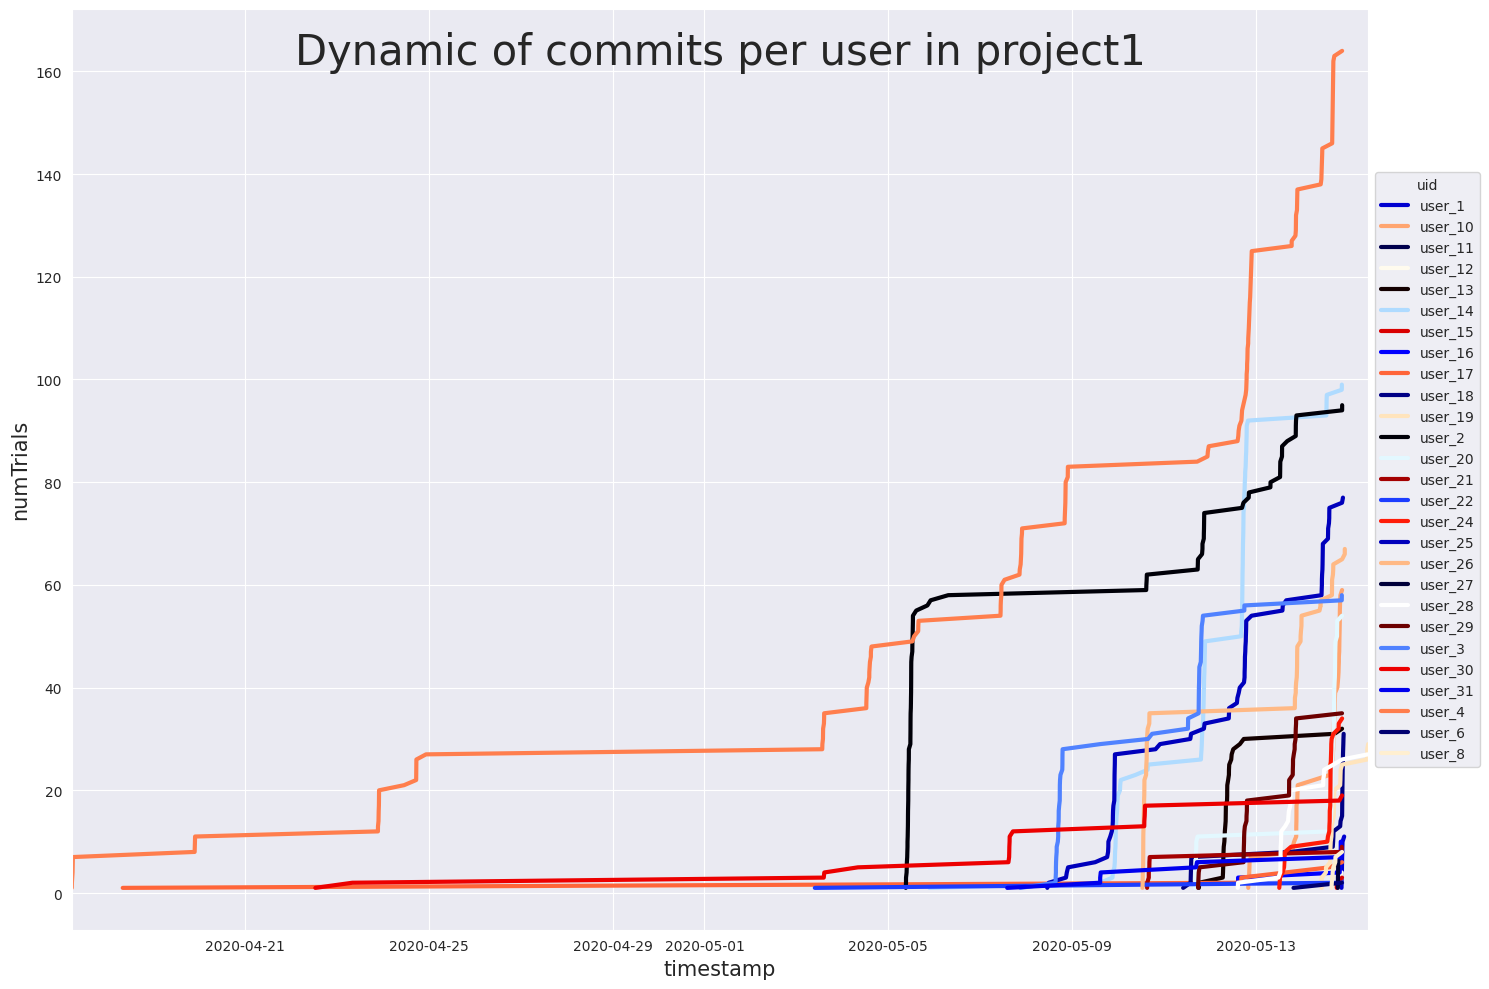

In [152]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))

ax = sns.lineplot(
    data=df,
    x='timestamp',
    y='numTrials',
    hue='uid',
    palette='flag',
    linewidth=3,
)

# Add title inside the plot at top center
ax.text(0.5, 0.93, "Dynamic of commits per user in project1", 
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax.transAxes,
        fontsize=30,)

plt.xlabel("timestamp", fontsize=15)
plt.ylabel("numTrials", fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='uid')
plt.xlim(df['timestamp'].min(), df['timestamp'].max())


plt.tight_layout()
plt.show()

* at the end of your Jupyter Notebook create a markdown cell and insert the questions
(answer them looking only at the graphs):
  * “Which user was the leader in the number of commits almost all of the time?”
The answer: user_*. 
  * “Which user was the leader for only a short period of time?” The answer:
user_*.

1. user_4
2. user_2

In [153]:
conn.close()